In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../../DL/Digit recognisation/train.csv')
df_test = pd.read_csv('../../DL/Digit recognisation/test.csv')

In [3]:
df_train.shape

(42000, 785)

In [4]:
df_train['label'].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
x=df_train.drop('label',axis=1)

In [6]:
x.shape

(42000, 784)

In [7]:
y=df_train['label']

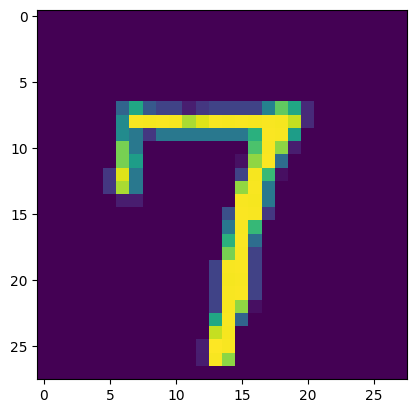

In [8]:
img = x.iloc[6].values.reshape(28,28)
plt.imshow(img)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=19)

In [10]:
x_train.shape

(33600, 784)

In [11]:
x.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [13]:
x_train_scaled.shape

(33600, 784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [16]:
y_train_cat.shape

(33600, 10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
hist = model.fit(x_train_scaled, y_train_cat, epochs=20, batch_size=64)

Epoch 1/20
525/525 [==============================] - 14s 7ms/step - loss: 0.5368 - accuracy: 0.8485
Epoch 2/20
525/525 [==============================] - 3s 5ms/step - loss: 0.2457 - accuracy: 0.9279
Epoch 3/20
525/525 [==============================] - 2s 4ms/step - loss: 0.1978 - accuracy: 0.9418
Epoch 4/20
525/525 [==============================] - 2s 4ms/step - loss: 0.1699 - accuracy: 0.9489
Epoch 5/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1492 - accuracy: 0.9547
Epoch 6/20
525/525 [==============================] - 2s 4ms/step - loss: 0.1344 - accuracy: 0.9594
Epoch 7/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1222 - accuracy: 0.9627
Epoch 8/20
525/525 [==============================] - 2s 4ms/step - loss: 0.1114 - accuracy: 0.9666
Epoch 9/20
525/525 [==============================] - 3s 5ms/step - loss: 0.1025 - accuracy: 0.9698
Epoch 10/20
525/525 [==============================] - 4s 7ms/step - loss: 0.0945 - accuracy: 0.971

# digit recognisation on own handwriting

In [28]:
import os ,cv2

In [29]:
A = cv2.imread('../../DL/Digit recognisation/images/image 0.jpg',0)

In [30]:
os.listdir('../../DL/Digit recognisation/images/')

['image 0.jpg',
 'image 00.jpg',
 'image 1.jpg',
 'image 11.jpg',
 'image 2.jpg',
 'image 3.jpg',
 'image 33.jpg',
 'image 4.jpg',
 'image 5.jpg',
 'image 55.jpg',
 'image 6.jpg',
 'image 7.jpg',
 'image 77.jpg',
 'image 8.jpg',
 'image 88.jpg',
 'image 9.jpg',
 'image 99.jpg']

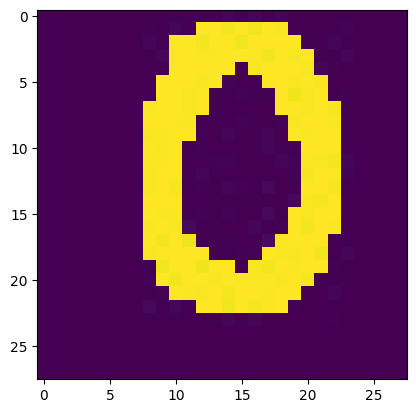

In [31]:
plt.imshow(img)

In [32]:
A = cv2.resize(A,(28,28))
A.shape

(28, 28)

In [33]:
A = A.reshape(1,784)/255

In [34]:
A.shape

(1, 784)

In [35]:
model.predict_on_batch(A).argmax()

6

In [36]:
def predict(path):
    A = cv2.imread(path, 0)
    A = cv2.resize(A,(28,28))
    A = A.reshape(1,784)/255
    return model.predict_on_batch(A).argmax()

In [41]:
predict('../../DL/Digit recognisation/images/'+'image 0.jpg')

6

In [42]:
filenames = os.listdir('../../DL/Digit recognisation/images/')
for filename in filenames:
    print('../../DL/Digit recognisation/images/'+filename)

../../DL/Digit recognisation/images/image 0.jpg
../../DL/Digit recognisation/images/image 00.jpg
../../DL/Digit recognisation/images/image 1.jpg
../../DL/Digit recognisation/images/image 11.jpg
../../DL/Digit recognisation/images/image 2.jpg
../../DL/Digit recognisation/images/image 3.jpg
../../DL/Digit recognisation/images/image 33.jpg
../../DL/Digit recognisation/images/image 4.jpg
../../DL/Digit recognisation/images/image 5.jpg
../../DL/Digit recognisation/images/image 55.jpg
../../DL/Digit recognisation/images/image 6.jpg
../../DL/Digit recognisation/images/image 7.jpg
../../DL/Digit recognisation/images/image 77.jpg
../../DL/Digit recognisation/images/image 8.jpg
../../DL/Digit recognisation/images/image 88.jpg
../../DL/Digit recognisation/images/image 9.jpg
../../DL/Digit recognisation/images/image 99.jpg


In [44]:
for filename in filenames:
    digit = predict('../../DL/Digit recognisation/images/'+filename)
    print(filename,'\t',digit)

image 0.jpg 	 6
image 00.jpg 	 0
image 1.jpg 	 3
image 11.jpg 	 3
image 2.jpg 	 2
image 3.jpg 	 3
image 33.jpg 	 6
image 4.jpg 	 8
image 5.jpg 	 3
image 55.jpg 	 5
image 6.jpg 	 6
image 7.jpg 	 8
image 77.jpg 	 3
image 8.jpg 	 3
image 88.jpg 	 6
image 9.jpg 	 3
image 99.jpg 	 3


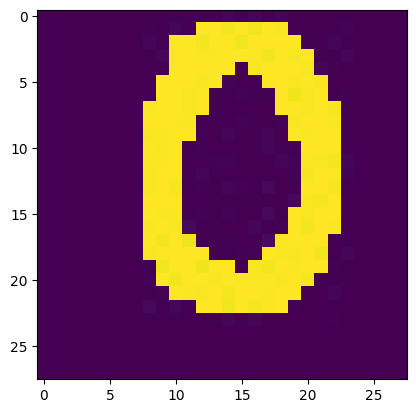

In [45]:
plt.imshow(A.reshape(28,28))